![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_orange.png?raw=true)

# 1.0 Medical Data Visualization Set Up

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_orange.png?raw=true)

### 1.1 Traditional Way of Reading CSV

We can read CSV files from online sources in the more traditional way, using `requests` library.
After fetching the csv file, the text has to be parsed, split into lines, then further splitted down into values
seperated by the delimiter.

In [182]:
import requests
from typing import *

def read_CSV( url: str, delimiter:str =',' ) -> List:

    #   Invalid delimiter. Raise an ValueError
    if len(delimiter) != 1:
        raise ValueError("Delimiter must consist of only a single character!")

    response: requests.Response = requests.get( url )
    #   Unable to fetch from given URL, raise an ConnectionError
    if response.status_code != 200:
        raise ConnectionError("Unable to fetch the csv file at {}".format(url) )

    #   The csv file fetched does not split the lines for us. Split them based on \n first
    rawCSVTextRows = response.text.split('\n')

    resultList:List = []

    for line in rawCSVTextRows:
        values = line.split( delimiter )
        resultList.append( values )

    return resultList

---

Here is a code snippet to test the above function if it is working:

In [183]:
testlist = read_CSV( 'https://raw.githubusercontent.com/AdmiJW/Items/master/medical_examination.csv' )

for i in range(10):
    print( testlist[i] )

['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
['0', '18393', '2', '168', '62.0', '110', '80', '1', '1', '0', '0', '1', '0']
['1', '20228', '1', '156', '85.0', '140', '90', '3', '1', '0', '0', '1', '1']
['2', '18857', '1', '165', '64.0', '130', '70', '3', '1', '0', '0', '0', '1']
['3', '17623', '2', '169', '82.0', '150', '100', '1', '1', '0', '0', '1', '1']
['4', '17474', '1', '156', '56.0', '100', '60', '1', '1', '0', '0', '0', '0']
['8', '21914', '1', '151', '67.0', '120', '80', '2', '2', '0', '0', '0', '0']
['9', '22113', '1', '157', '93.0', '130', '80', '3', '1', '0', '0', '1', '0']
['12', '22584', '2', '178', '95.0', '130', '90', '3', '3', '0', '0', '1', '1']
['13', '17668', '1', '158', '71.0', '110', '70', '1', '1', '0', '0', '1', '0']


---

Remember that parsing files in this way and passing it into the `DataFrame` later, will cause all the datatypes to be defaulted to `string` type. Then we have to manually change the datatype ourselves.

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_orange.png?raw=true)

### 1.2 Panda's way of Reading CSV

CSV files can be easily read by using `pandas` library, using `read_csv()` method. It will directly parse the csv file fetched, determine the best suited datatype for all of them, and return a `DataFrame`, which saves us a lot of work!

In [184]:
import pandas as pd

#    A toned down version of read_csv() from the pandas library. Returns a DataFrame
def read_CSV_Pandas( url:str, delimiter=',' ) -> pd.DataFrame:
    dataFrame: pd.DataFrame = pd.read_csv( url, sep=delimiter )

    return dataFrame

---

Here's a little code snippet to test if the above function works:

In [185]:
testlist = read_CSV_Pandas( 'https://raw.githubusercontent.com/AdmiJW/Items/master/medical_examination.csv' )

testlist

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_blue.png?raw=true)

# 2.0 Stage #1: Fetching the Data

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_blue.png?raw=true)

### 2.1 Fetching the Data

Now we will have to determine which method to fetch the data. 

We will be using the manual method of fetching csv, which returns everything in a list of strings Pass that into the DataFrame constructor, then we will need to clean up the data, changing the datatypes etc

In [186]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [187]:
rawStringList = read_CSV( 'https://raw.githubusercontent.com/AdmiJW/Items/master/medical_examination.csv' )

df = pd.DataFrame( rawStringList )

df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
2,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
3,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
4,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70000,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0
70001,,None,None,None,None,None,None,None,None,None,None,None,None
70002,,None,None,None,None,None,None,None,None,None,None,None,None
70003,,None,None,None,None,None,None,None,None,None,None,None,None


---

As we can notice, everything doesn't seem right. The column names are included in row1, the last few rows contains invalid data, and the index shall be set as the id of the patients.

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70005 entries, 0 to 70004
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       70005 non-null  object
 1   1       70001 non-null  object
 2   2       70001 non-null  object
 3   3       70001 non-null  object
 4   4       70001 non-null  object
 5   5       70001 non-null  object
 6   6       70001 non-null  object
 7   7       70001 non-null  object
 8   8       70001 non-null  object
 9   9       70001 non-null  object
 10  10      70001 non-null  object
 11  11      70001 non-null  object
 12  12      70001 non-null  object
dtypes: object(13)
memory usage: 3.5+ MB


---

As we can see, all the columns datatype are strings, which can be very space consuming (as Python object, not numpy datatypes)

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_green.png?raw=true)

# 3.0 Cleaning Up the Data

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_green.png?raw=true)

Now we have some __ACTUAL__ cleaning up to do. Let's see:

* Set the correct column names
* Set the index of the rows to the patient's id
* Delete the few last rows which obviously is empty rows
* Set the correct datatypes for each column
    
We will be seperating those tasks into different chapters.
* This chapter for task 1, 2, 3
* Correcting datatypes for chapter 4

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_green.png?raw=true)

### 3.1 - Correcting column names

The column names are loaded as a row data into the `DataFrame`, which it isn't supposed to.

Therefore, we will need to set that row as the header, then drop that first row afterwards.


In [189]:
# Ensure the first row
print("Before: ")
print( df.head() )


# Set the column names by the first row values
df.columns = df.iloc[0]


# Now drop the first row, in-place
df.drop(0, axis=0, inplace=True )

# Let's ensure the correctness now
print("After: ")
df.head()

Before: 
   0      1       2       3       4      5      6            7     8      9   \
0  id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke   
1   0  18393       2     168    62.0    110     80            1     1      0   
2   1  20228       1     156    85.0    140     90            3     1      0   
3   2  18857       1     165    64.0    130     70            3     1      0   
4   3  17623       2     169    82.0    150    100            1     1      0   

     10      11      12  
0  alco  active  cardio  
1     0       1       0  
2     0       1       1  
3     0       0       1  
4     0       1       1  
After: 


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
2,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
3,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
4,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
5,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_green.png?raw=true)

### 3.2 - Deleting Last Empty Rows

Some of the rows at the tail of the `DataFrame` are empty. We need to remove those. Let's see:

In [190]:

# Before:
print( df.tail(10) )
# Seems like the last 4 rows are empty. Let's change that

# Overwriting the df to the new DataFrame with the last empty rows removed
df = df.iloc[:-4]

# Last checking
df.tail()

0         id    age gender height weight ap_hi ap_lo cholesterol  gluc smoke  \
69995  99992  21074      1    165   80.0   150    80           1     1     0   
69996  99993  19240      2    168   76.0   120    80           1     1     1   
69997  99995  22601      1    158  126.0   140    90           2     2     0   
69998  99996  19066      2    183  105.0   180    90           3     1     0   
69999  99998  22431      1    163   72.0   135    80           1     2     0   
70000  99999  20540      1    170   72.0   120    80           2     1     0   
70001          None   None   None   None  None  None        None  None  None   
70002          None   None   None   None  None  None        None  None  None   
70003          None   None   None   None  None  None        None  None  None   
70004          None   None   None   None  None  None        None  None  None   

0      alco active cardio  
69995     0      1      1  
69996     0      1      0  
69997     0      1      1  
69998  

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69996,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69997,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69998,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69999,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
70000,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_red.png?raw=true)

# 4.0 Setting the Correct Datatype

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_red.png?raw=true)

Now, we will be setting the datatype of each column one by one. This shall be done so that we can analyse the data without running into problems. All the column datatype are probably strings, which computer cannot analyse it like numbers

Before we go parsing each column into a different datatype, we shall check the column if it contains any non parsable data?
Let's create a own made function for that

In [191]:
#  This function will take in a pandas Series object, and optional setting if the Series should only consist of Positive value
#  only
#  If the Series is valid (No parsing error), then returns
#  List -> [ True, [minValue, maxValue] ]
#  Otherwise if the Series contains bad value(s), then it will return
#  List -> [ False, [...index of bad value(s) ] ]

def checkParsableToInt( data:pd.Series, isPositiveOnly: bool = True)-> List:
    resList = [True, []]
    dmin = float("inf")
    dmax = -float("inf")
    
    iterator = data.index if hasattr(data, 'index') else range( len(data) )

    for i in iterator:
        d = data[i]
        try:
            d = float(d)

            if isPositiveOnly and d < 0:
                raise AssertionError("Contains negative!")
            dmin = min(d, dmin)
            dmax = max(d, dmax)
        except:
            resList[0] = False
            resList[1].append(i)

    if resList[0]:
        resList[1].append(dmin)
        resList[1].append(dmax)
    return resList


### ![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_red.png?raw=true)

### 4.1 - Id column

In [192]:
####################
#   Checking
####################
print( checkParsableToInt(df.id) )

### # As we can see, the indices goes up to 99999, which int32 is the most suitable type for it

df.id = df.id.astype( np.int32 )

[True, [0.0, 99999.0]]


c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_red.png?raw=true)

### 4.2 - Age column

In [193]:
####################
#   Checking
####################
print( checkParsableToInt(df.age, True) )      # True, [10798.0, 23713.0] 

# Wait what? Why does age look so much? A quick look at the readme.md reveals that age is stored in day(s). Let's convert them
# into actual ages!

df.age = df.age.astype( np.int16 ) // 365
df.age = df.age.astype( np.int8 )


print( df.age.min(), df.age.max() )

[True, [10798.0, 23713.0]]
29 64


![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_red.png?raw=true)

### 4.3 - Gender column

In [194]:
####################
#   Checking
####################
print( df.gender.unique() )           # ['2', '1', '3']


# Just 1, 2 and 3, which fits well in int8
df.gender = df.gender.astype( np.int8 )

['2' '1' '3']


![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_red.png?raw=true)

### 4.4 - Height column

In [195]:
####################
#   Checking
####################
print( checkParsableToInt( df.height ) )     # True, [55.0, 250.0]

# Let's fit it in int16

df.height = df.height.astype( np.int16 )

[True, [55.0, 250.0]]


![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_red.png?raw=true)

### 4.5- Weight column

In [196]:
####################
#   Checking
####################
print( checkParsableToInt( df.weight ) )     # True, [10.0, 200.0]

# Let's fit it as int16

df.weight = df.weight.astype( np.float32 )


[True, [10.0, 200.0]]


![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_red.png?raw=true)

### 4.6- ap_hi column

In [197]:
####################
#   Checking
####################
checkResult = checkParsableToInt( df.ap_hi )      
print(checkResult)                            # [False, [6525, 22881, 29313, 34295, 36025, 50055, 66571] ]

print( df.loc[ checkResult[1], 'ap_hi'] )       # Let's see what's goes wrong. Seems like those data is negative values
                                                # Let's take note of those error and handle them at data cleaning stage!
    
checkResult = checkParsableToInt( df.ap_hi, False )
print( checkResult )                         # [True, [-150.0, 16020.0] ]
                                             # No other problems than the negative values. Let's change to int16
    
df.ap_hi = df.ap_hi.astype( np.int16 )

[False, [4608, 16022, 20537, 23989, 25241, 35041, 46628]]
4608     -100
16022    -115
20537    -100
23989    -140
25241    -120
35041    -150
46628    -120
Name: ap_hi, dtype: object
[True, [-150.0, 16020.0]]


![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_red.png?raw=true)

### 4.6- ap_lo column

In [198]:
####################
#   Checking
####################
checkResult = checkParsableToInt( df.ap_lo) 
print( checkResult )                         # [False, [85816] ]
                                             # We got a problem again. Let's peek into it

print( df.ap_lo.loc[checkResult[1] ] )       # Seems like above problem, we've got a negative value here.

checkResult = checkParsableToInt( df.ap_lo, False )
print( checkResult )                         # [True, [-70.0, 11000.0] ]

# Therefore, let's convert to int16 for it

df.ap_lo = df.ap_lo.astype( np.int16 )

[False, [60107]]
60107    -70
Name: ap_lo, dtype: object
[True, [-70.0, 11000.0]]


![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_red.png?raw=true)

### 4.7 - Cholesterol column

In [199]:
####################
#   Checking
####################
print( df.cholesterol.unique() )        # ['1', '3', '2']


# Go ahead and parse it to int8

df.cholesterol = df.cholesterol.astype( np.int8 )

['1' '3' '2']


![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_red.png?raw=true)

### 4.8 - Glucose column

In [200]:
####################
#   Checking
####################
print( df.gluc.unique() )        # ['1', '3', '2']


# Go ahead and parse it to int8

df.gluc = df.gluc.astype( np.int8 )

['1' '2' '3']


![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_red.png?raw=true)

### 4.9 - Smoking, Alcohol Intake, Physical Activity and Cardiovascular Disease column

In [201]:
####################
#   Checking
####################
print( df.smoke.unique() )
print( df.alco.unique() )
print( df.active.unique() )
print( df.cardio.unique() )           # All are STRING boolean values of 0 and 1.

# Let's parse them into np.int8 type
df = df.astype( {"smoke": np.int8, "alco": np.int8, "active": np.int8, "cardio": np.int8} )


# After they have been converted to int8 of 0 and 1 only, we can easily parse them again into bool type, but for the sake of
# this project, let's don't do it

#     df = df.astype( {"smoke": np.bool_, "alco": np.bool_, "active": bool, "cardio": bool} )



['0' '1']
['0' '1']
['1' '0']
['0' '1']


![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_orange.png?raw=true)

# 5.0 - Tackling Task #1

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_orange.png?raw=true)

Now we have 2 tasks to do with the data in current ready state:
* Normalize data on Glucose and Cholesterol column. 1 goes to 0, 2 and 3 goes to 1
* Add overweight column - 0 for NOT overweight, 1 for overweight

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_orange.png?raw=true)

### 5.1 - Normalize data

To change all values from 1 to 0, and 2, 3 to 1, we can simply use the panda's `replace` method, or `map`. It's the same either way

In [202]:
mapper = { 1:0, 2:1, 3:1 }

df.cholesterol = df.cholesterol.map( mapper )

df.gluc = df.gluc.replace( mapper )



![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_orange.png?raw=true)

### 5.2 - Add Overweight column

Remember. Calculate the BMI ( kg / m^2 ), if the value is over 25, it is considered overweight and value assigned shall be 1, otherwise 0

In [203]:
# Obtain the weights column and height column, but squared
weights = df.weight
heights_squared = (df.height / 100) ** 2

# Create a boolean mask which is True for those overweight, and False for those who doesn't
overweight = (weights / heights_squared) > 25

# Replace True values with 1 (Overweight), while False with 0 (Not overweight)
overweight = overweight.map( { False: 0, True: 1} ).astype( np.int8 )

# Now insert it into the DataFrame
df['overweight'] = overweight

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_red.png?raw=true)

# 6.0 - Tackling Task #2 - Catplot

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_red.png?raw=true)

We have to make a categorical plot. The plot will consist of 2 subplots, one for those with cardiovascular disease, and one for those who doesn't.

In each plot, it will plot the other categorical datas (at x-axis)
* `active`
* `alco`
* `cholesterol`
* `gluc`
* `overweight`
* `smoke`

which each category consist of 2 bars: 0 and 1 values

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_red.png?raw=true)

### 6.1 - Plotting the chart

In [204]:
# If we haven't already, import those visualization libraries!

import matplotlib.pyplot as plt
import seaborn as sns


In [212]:

# We will be drawing it in a function

def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    # melt() basically creates a new DataFrame in LONG FORMAT
    df_cat = df.melt(
           id_vars = ['id', 'cardio'],
           value_vars = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'],
           var_name = 'variable'
    )


    # Draw the catplot with 'sns.catplot()'
    facet_grid = sns.catplot(
        x = 'variable',
        hue = 'value',
        data = df_cat,
        col = 'cardio',
        kind = 'count',
        legend = True
    )
    
    facet_grid.set_ylabels('total')


    facet_grid.savefig('catplot.png')
    return facet_grid

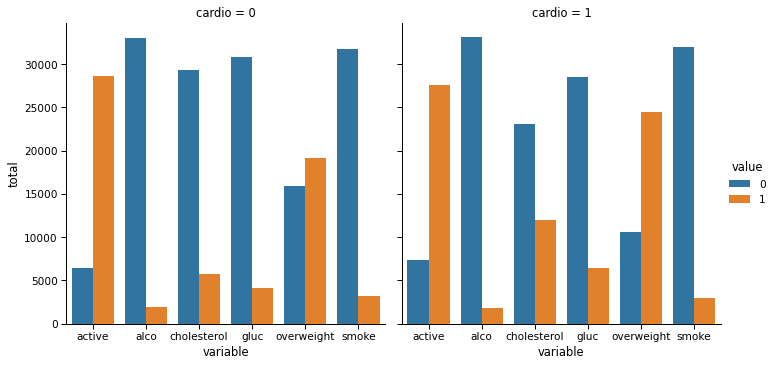

In [213]:
draw_cat_plot()

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_purple.png?raw=true)

# 7.0 - Clean Patient Data

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_purple.png?raw=true)

In this section, we will be cleaning patient datas:
* Diastolic > Systolic   ( Note some of them are negative, which also needs to be eliminated!)
* Height less than 2.5th percentile
* Height more than 97.5th percentile
* Weight less than 2.5th percentile
* Weight more than 97.5th percentile

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_purple.png?raw=true)

### 7.1 - Diastolic > Systolic, and Negative values

It's impossible for a blood pressure to go below negative! Also, diastolic BP (When the heart relaxes) shall never be higher than the systolic BP (When the heart contracts).
For those rows, we will be dropping them (filtering them)

In [214]:

bpMask = (df.ap_lo < 0) | (df.ap_hi < 0) | (df.ap_lo > df.ap_hi)

print( bpMask.sum() )     # 1235, We have 1235 rows to drop!

bpIndexToDrop = df.loc[ bpMask ].index     # Get the indices of the rows to drop

df.drop( bpIndexToDrop, inplace=True)      # Now drop the rows in place!


1235


![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_purple.png?raw=true)

### 7.2 - Height is less than 2.5th percentile and greater than 97.5th percentile

From previous section, we see that the lowest height is 55cm, while the highest height is 250cm. Seems like not too realistic isn't it?

No matter what, we shall be filtering those rows.

In [215]:

lowPercentile = np.percentile( df.height, 2.5 )     # 2 Different ways to compute. Using numpy native function, and using
highPercentile = df.height.quantile( 0.975 )        # Pandas object method

print( lowPercentile, highPercentile )              # 150.0    180.0

heightMask = (df.height < lowPercentile) | (df.height > highPercentile)
heightIndexToDrop = df.height.loc[ heightMask ].index

print("Columns to drop: ", heightMask.sum() )        # We have another 2907 columns to drop

# Drop the rows
df.drop( heightIndexToDrop, inplace=True )


150.0 180.0
Columns to drop:  2907


![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_purple.png?raw=true)

### 7.3 - Weight is less than 2.5th percentile and greater than 97.5th percentile

From previous section, we see that the lowest weight is 10.0kg, while the highest height is 200.0kg. Seems like not too realistic isn't it?

No matter what, we shall be filtering those rows.

In [216]:

lowPercentile = np.percentile( df.weight, 2.5 )
highPercentile = df.weight.quantile( 0.975 )

print( lowPercentile, highPercentile )          # 52.0    106.0

heightMask = (df.weight < lowPercentile) | (df.weight > highPercentile)
heightIndexToDrop = df.height.loc[heightMask].index

print( heightMask.sum() )     # Seems like we got 3075 rows to drop

df.drop( heightIndexToDrop, inplace=True)


52.0 106.0
3075


![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_darkred.png?raw=true)

# 8.0 - Tackling Task #3 - Heatmap

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_darkred.png?raw=true)

Now the data is cleaned and ready to be analysed! The final task for us is to:
* Create a correlation matrix based on current DataFrame
* Mask the upper triangle
* Draw out the heatmap

In [217]:


def draw_heat_map():
    
    df_heat = df.copy()
    
    bpToDrop = (df.ap_hi < df.ap_lo)
    
    heightLowQuartile = df.height.quantile(0.025)
    heightHighQuartile = np.percentile( df.height, 97.5 )

    heightToDropMask = (df.height < heightLowQuartile) | (df.height > heightHighQuartile)
    
    weightLowQuartile = df.weight.quantile(0.025)
    weightHighQuartile = np.percentile( df.weight, 97.5 )

    weightToDropMask = (df.weight < weightLowQuartile) | (df.weight > weightHighQuartile)
    
    combinedToDropMask = df.loc[ bpToDrop | heightToDropMask | weightToDropMask ]

    df_heat.drop( combinedToDropMask.index, inplace=True )

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr)
    mask[ np.triu_indices_from( df_heat) ] = True

    # Set up the matplotlib figure
    fig = plt.figure( figsize=(12,8) )

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(
        data = corr,
        annot = True,
        mask = mask,
        fmt = '.1f',
        linewidths=.5
    )

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

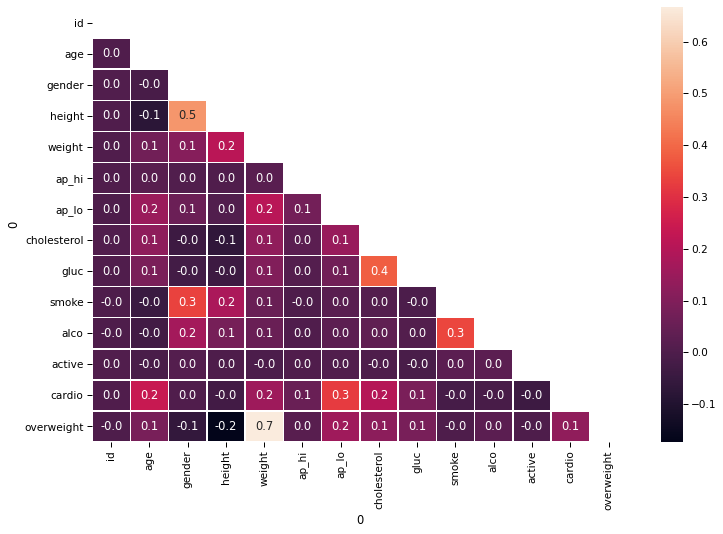

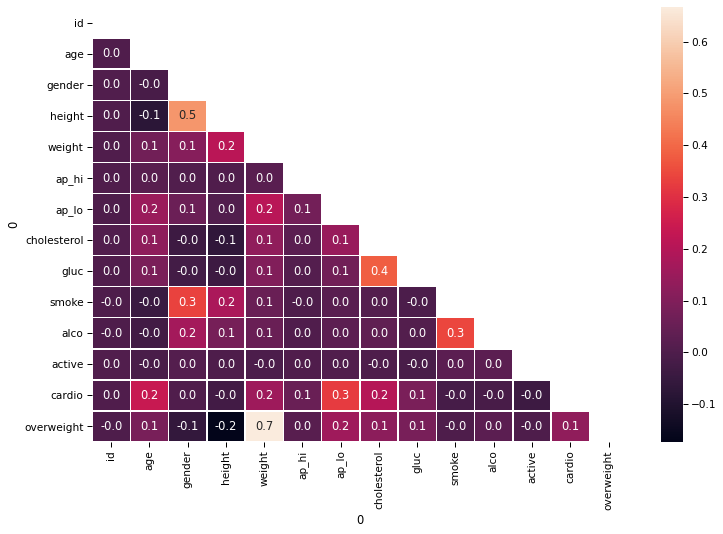

In [218]:
draw_heat_map()